# Multicollinearity

In [1]:
%load_ext kedro.extras.extensions.ipython
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2
#%config Completer.use_jedi = False

                    WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/extra ]8;id=263801;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=171190;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             s/extensions/ipython.py:19: KedroDeprecationWarning:                                  
                             kedro.extras.extensions.ipython should be accessed only using the                     
                             alias kedro.ipython. The unaliased name will be removed in Kedro                      
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as: /home/maa/dev/PHD.                           ]8;id=739714;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=976641;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/frame ]8;id=741618;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=465138;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             work/startup.py:99: KedroDeprecationWarning: project_version in                       
                             pyproject.toml is deprecated, use kedro_init_version instead                          
                               warnings.warn(                                                                      
                                                                                                                   

[02/12/24 14:16:28] WARNING  /home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/pa ]8;id=781435;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=850572;file:///home/maa/miniconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             rtitioned_dataset.py:200: KedroDeprecationWarning:                                    
                             'PartitionedDataset' has been moved to `kedro-datasets` and will be                   
                             removed in Kedro 0.19.0.                                                              
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project phd                                                      ]8;id=84976;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=52590;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=407120;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=860820;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [25]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
import numpy as np
import yaml

from vessel_manoeuvring_models.visualization.plot import track_plot, plot
from phd.visualization.plot_ship import track_plots
from vessel_manoeuvring_models.prime_system import PrimeSystem
from phd.visualization.plot_prediction import plot_total_force, plot_force_components, predict, plot_compare_model_forces, plot_parameter_contributions, group_parameters, joined_parameter_contributions, same_ylims
from vessel_manoeuvring_models.symbols import *
import matplotlib.pyplot as plt
from vessel_manoeuvring_models.substitute_dynamic_symbols import run, lambdify, remove_functions, prime
from vessel_manoeuvring_models.parameters import df_parameters
p = df_parameters["symbol"]
import statsmodels.api as sm
import sympy as sp
from sympy import Eq, symbols, latex
import paper
from paper import save_fig, save_eq
import yaml
with open("styles.yml", mode='r') as file:
    styles = yaml.safe_load(file)
from phd.pipelines.predict.nodes import score
import vessel_manoeuvring_models.models.IMO_simulations
from phd.pipelines.load_wPCC.nodes import preprocess,zigzag_angle
from vessel_manoeuvring_models.prime_system import PrimeSystem
plt.set_cmap("Greens") 

<Figure size 825x570 with 0 Axes>

In [3]:
#%reload_kedro
ship='wPCC'
ship_data = catalog.load(f"{ship}.ship_data")

[02/12/24 14:16:33] INFO     Loading data from 'wPCC.ship_data' (YAMLDataSet)...                ]8;id=797023;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=388148;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [27]:
tests_ek_joined = catalog.load(f"{ship}.tests_ek_smooth_joined")
tests_ek_joined['beta_deg'] = np.rad2deg(tests_ek_joined['beta'])
tests_ek = catalog.load(f"{ship}.tests_ek2")
tests_ek_smooth = catalog.load(f"{ship}.tests_ek_smooth")

[02/12/24 15:03:49] INFO     Loading data from 'wPCC.tests_ek_smooth_joined' (CSVDataSet)...    ]8;id=611143;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=592811;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

[02/12/24 15:03:51] INFO     Loading data from 'wPCC.tests_ek2' (PartitionedDataset)...         ]8;id=763293;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=663573;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'wPCC.tests_ek_smooth' (PartitionedDataset)...   ]8;id=921747;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=367245;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [5]:
tests_ek_joined['id'].unique()

array([22765, 22770, 22772, 22773])

In [6]:
ids = [22765,22773]
mask = tests_ek_joined['id'].isin(ids)
tests_ek_joined_plot = tests_ek_joined.loc[mask]

In [7]:
prime_system = PrimeSystem(L=ship_data['L'], rho=1000)

In [38]:
model = catalog.load(f"{ship}.models_VCT_MDL")['semiempirical_covered']()

[02/12/24 15:13:34] INFO     Loading data from 'wPCC.models_VCT_MDL' (PartitionedDataset)...    ]8;id=393156;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=914883;file:///home/maa/miniconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

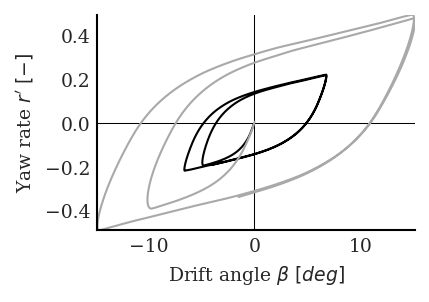

In [68]:
colors = ['black','darkgrey']
fig,ax=plt.subplots()
#for id, data in tests_ek_joined_plot.groupby(by='id'):
paper.scale_figure(fig,scale=0.5)
for id in ids:
    loader = tests_ek[str(id)]

    data = loader()    
    data = preprocess(data,ship_data=ship_data)
        
    result = model.simulate(data)
    result['V'] = np.sqrt(result['u']**2 + result['v']**2)
    
    data_prime = prime_system.prime(result[['beta','r']], U=result['V'])
    data_prime['beta_deg'] = np.rad2deg(data_prime['beta'])
    
    angle = int(abs(zigzag_angle(data)))
    label=f"zigzag{angle}/{angle}"
    data_prime.plot(x='beta_deg',y='r',label=label,color=colors.pop(0),ax=ax,lw=1.0)

ax.plot([2*data_prime['beta_deg'].min(),2*data_prime['beta_deg'].max()],[0,0], color='k',lw=0.5, zorder=-10)
ax.plot([0,0],[2*data_prime['r'].min(),2*data_prime['r'].max()], color='k',lw=0.5, zorder=-10)
ax.set_xlim([data_prime['beta_deg'].min(),data_prime['beta_deg'].max()])
ax.set_ylim([data_prime['r'].min(),data_prime['r'].max()])
ax.set_xlabel(r'Drift angle $\beta$ $[deg]$')
ax.set_ylabel(r"Yaw rate ${r}'$ $[-]$")
ax.grid(False)
#ax.legend(loc='upper left');
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7), ncol=2)
ax.get_legend().set_visible(False)
fig.savefig(paper.file_path_with_nb_ref("multicollinearity.svg"))